<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>

#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Read the dataset in the csv file from the URL


In [4]:
boston_df=pd.read_csv('https://cf2-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Data Description

·      CRIM - per capita crime rate by town
·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
·      INDUS - proportion of non-retail business acres per town.
·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
·      NOX - nitric oxides concentration (parts per 10 million)
·      RM - average number of rooms per dwelling
·      AGE - proportion of owner-occupied units built prior to 1940 (proportion of owner-occupied units, not the actual year a unit was built)
·      DIS - weighted distances to five Boston employment centres
·      RAD - index of accessibility to radial highways
·      TAX - full-value property-tax rate per $10,000
·      PTRATIO - pupil-teacher ratio by town
·      LSTAT - % lower status of the population
·      MEDV - Median value of owner-occupied homes in $1000's

In [11]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Generate Descriptive Statistics and Visualizations

### Task 2.1: For the "Median value of owner-occupied homes" provide a boxplot

Text(0, 0.5, "MEDV in $1000's")

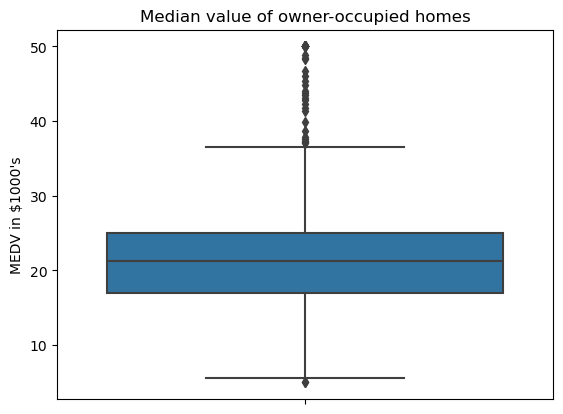

In [17]:
sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Median value of owner-occupied homes')
pyplot.ylabel("MEDV in $1000's")

### Task 2.2: Provide a bar plot for the Charles river variable

Text(0, 0.5, 'Number of tracts')

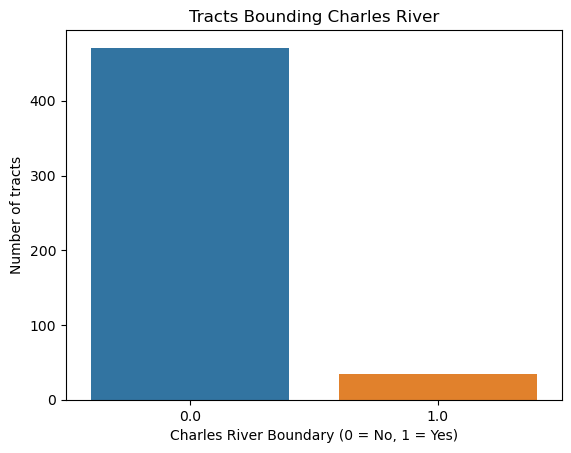

In [22]:
sns.countplot(x=boston_df['CHAS'],data=boston_df)
pyplot.title('Tracts Bounding Charles River')
pyplot.xlabel('Charles River Boundary (0 = No, 1 = Yes)')
pyplot.ylabel('Number of tracts')

### Task 2.3 Provide a boxplot for the MEDV variable vs the AGE variable.   
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0, 0.5, "Median value in $1000's")

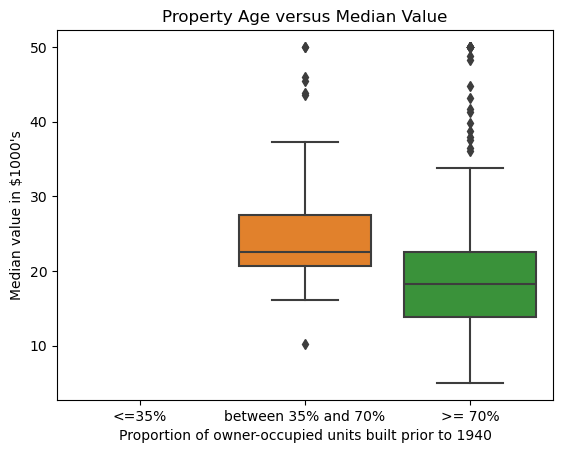

In [71]:
# create new column 'age_group' and conditionally assign values to it
# with '.loc' accessor 
boston_df.loc[boston_df['AGE']<=35, 'age_group'] = '<= 35%' 
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'age_group'] = 'between 35% and 70%'
boston_df.loc[(boston_df['AGE']>=70), 'age_group'] = '>= 70%'

# Create the boxplot
age_order = ['<=35%', 'between 35% and 70%', '>= 70%']  # define the order of the columns
sns.boxplot(x='age_group', y='MEDV', data=boston_df, order=age_order)
pyplot.title('Property Age versus Median Value')
pyplot.xlabel('Proportion of owner-occupied units built prior to 1940')
pyplot.ylabel("Median value in $1000's")

### Task 2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0, 0.5, 'Nitric oxide concentrations (pp10m)')

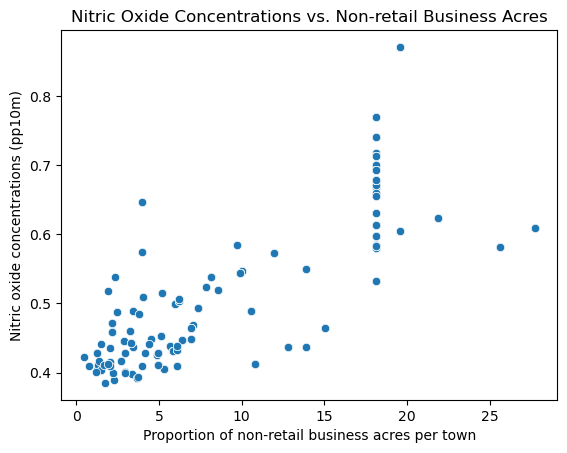

In [42]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title("Nitric Oxide Concentrations vs. Non-retail Business Acres")
pyplot.xlabel('Proportion of non-retail business acres per town')
pyplot.ylabel('Nitric oxide concentrations (pp10m)')

**Interpretation:**   
There is an upward trend in the chart. This indicates a positive correlation and suggests that areas with a higher proportion of non-retail business (likely industrial) activities tend to have higher nitric oxide concentrations.  
There is a vertical band of data points around the 17-18 range of the x-axis. It suggests taht there are a number of towns with similar proportion of industrial acres, but with varying nitric oxide levels. 

### Task 2.5 Create a histogram for the pupil to teacher ratio variable 

Text(0.5, 0, 'Pupil-Teacher Ratio')

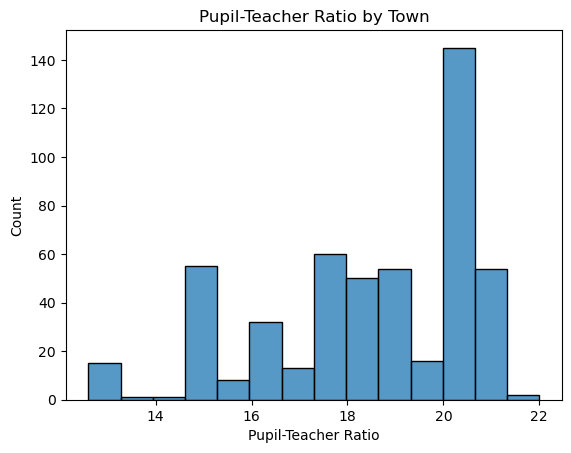

In [51]:
# pyplot.hist(x='PTRATIO', data=boston_df)
sns.histplot(x='PTRATIO', data=boston_df)
pyplot.title('Pupil-Teacher Ratio by Town')
pyplot.xlabel('Pupil-Teacher Ratio')

## Task 3: Use the appropriate tests to answer the questions provided. 

Be sure to:
1.	State your hypothesis.
2.	Use α = 0.05
3.	Perform the test Statistics.
4.	State the conclusion from the test.

### Task 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) 

H0: There is no significant difference in the median value of houses bounded by the Charles river and those not.
H1: There is a significant difference in the median value of houses bounded by the Charles River and those not.

In [57]:
# Levene's test is necessary before performing a t-test
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [61]:
# levene p-value<0.05, implying unequal variance. 
# Independent t test compares the means
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'], equal_var=False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:**
The p-value is much smaller than the significance level of 0.05. This means that it is highly unlikely to observe such a difference in median house values between the two groups by random chance if there were no differnece in the population.
Therefore, the H0 is rejected. This indicates that being surrounded by the river has an impact on the median house values in Boston.

### Task 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)   
In other words: Whether there's a relationship between the median house value and the proportion of older units (built before 1940) in the area.

H0: There is NO significant differnce in the means of median house values (MEDV) between the three groups, which have different proportions of old houses.  
H1: There is significant differnce in the means of median house values (MEDV) between groups. At least one group has a different mean house value. 

In [73]:
# the AGE variable has been descretized in Task 2.3, with age_group column added. 
# get corresponding median values for each group.
group_35_lower = boston_df[boston_df['age_group'] == '<= 35%']["MEDV"]
group_35_70 = boston_df[boston_df['age_group'] == 'between 35% and 70%']["MEDV"]
group_70_above = boston_df[boston_df['age_group'] == '>= 70%']["MEDV"]

# use `f_oneway` function to perform the ANOVA test.
scipy.stats.f_oneway(group_35_lower,group_35_70,group_70_above)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Interpretation:** The p-value is significantly lower than than alpha 0.05. The Null hypothesis is rejected.   
**Conclusion:** There is a significant difference in the house values across the three groups with different proportions of older units in the area.

Note: The one-way ANOVA is actually a non-directional test. It simply tells you if there's a significant difference somewhere among the groups, without specifying which groups are higher or lower.  

#### Task 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: There is no correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.  
H1: There is a correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town. 

In [77]:
# both NOX and INDUS are continuous variables. Use Pearson correlation test.
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209161, pvalue=7.913361061232958e-98)

**Interpretation:** R score (correlation coefficient) is 0.76, suggesting a strong positive correlation. And the pvalue of 7.91e-98 is greatly less than 0.05, so the null hypothesis is rejected.  
**Conclusion:** There is a correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town. 

### Task 3.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: The distance to Boston employment centers (DIS) has no linear impact on the median house values (MEDV).  
H1: Distance to Boston employment centers (DIS) has a significant impact on median house values (MEDV).

In [95]:
x= boston_df['DIS']   # predicator 
y= boston_df['MEDV']  # response
x= sm.add_constant(x)  # add constant beta_0
model = sm.OLS(y, x).fit() # fit the model
prediction = model.predict(x) # make prediction
model.summary()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        14:14:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** Prob (F-statistic) tests the overall significance of the regression model. A value of 1.21e-08 indicates that the predicator (DIS) significantly explains variation in the dependent variable (MEDV).  
P>|t| is the p-value for testing the hypothesis that the coefficient is equal to zero (no effect). A value of 0.00 indicates that DIS significantly impacts MEDV.  
**Conclusion:** Distance to Boston employment centers (DIS) has a significant impact on median house values (MEDV).

2025-03-12